In [42]:
import os
import pandas as pd

features = pd.read_csv('Features data set.csv')
sales = pd.read_csv('sales data-set.csv')
stores = pd.read_csv('stores data-set.csv')

#Print Shape, Column Names, Dataframe Head, 
print('Features Data', '\n--------------------', '\nShape:', features.shape, "\nColumns:",features.columns.tolist(), '\n', features.head(), '\n====================')
print('Sales Data', '\n--------------------', '\nShape:', sales.shape, "\nColumns:",sales.columns.tolist(), '\n', sales.head(), '\n====================')
print('Stores Data', '\n--------------------', '\nShape:', stores.shape, "\nColumns:",stores.columns.tolist(), '\n', stores.head())

Features Data 
-------------------- 
Shape: (8190, 12) 
Columns: ['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday'] 
    Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106  

In [43]:
#Merge dataframes using pd.merge 
df=pd.merge(sales,features, on=['Store','Date', 'IsHoliday'], how='left')
dfmerged=pd.merge(df,stores, on=['Store'], how='left')

#Convert dates into python date time object
dfmerged['Date'] = pd.to_datetime(dfmerged['Date'])

print('dfmerged Data', '\n--------------------', '\nShape:', dfmerged.shape, "\nColumns:",dfmerged.columns.values, '\n', dfmerged.head())

dfmerged Data 
-------------------- 
Shape: (421570, 16) 
Columns: ['Store' 'Dept' 'Date' 'Weekly_Sales' 'IsHoliday' 'Temperature'
 'Fuel_Price' 'MarkDown1' 'MarkDown2' 'MarkDown3' 'MarkDown4' 'MarkDown5'
 'CPI' 'Unemployment' 'Type' 'Size'] 
    Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-05-02      24924.50      False        42.31       2.572   
1      1     1 2010-12-02      46039.49       True        38.51       2.548   
2      1     1 2010-02-19      41595.55      False        39.93       2.514   
3      1     1 2010-02-26      19403.54      False        46.63       2.561   
4      1     1 2010-05-03      21827.90      False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289

In [44]:
#Print Datatypes
print(dfmerged.dtypes)

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
dtype: object


In [45]:
#Review the column names, null value counts and data types of dfmerged using .info()
print(dfmerged.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [46]:
#Print the range of column values using .agg() and use .T to transpose for readability
print(dfmerged.agg([min, max]).T)

                              min                  max
Store                           1                   45
Dept                            1                   99
Date          2010-01-10 00:00:00  2012-12-10 00:00:00
Weekly_Sales             -4988.94               693099
IsHoliday                   False                 True
Temperature                 -2.06               100.14
Fuel_Price                  2.472                4.468
MarkDown1                    0.27              88646.8
MarkDown2                 -265.76               104520
MarkDown3                   -29.1               141631
MarkDown4                    0.22              67474.9
MarkDown5                  135.16               108519
CPI                       126.064              227.233
Unemployment                3.879               14.313
Type                            A                    C
Size                        34875               219622


In [47]:
#Review Summary Statistics
print(dfmerged.describe())

               Store           Dept   Weekly_Sales    Temperature  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       22.200546      44.260317   15981.258123      60.090059   
std        12.785297      30.492054   22711.183519      18.447931   
min         1.000000       1.000000   -4988.940000      -2.060000   
25%        11.000000      18.000000    2079.650000      46.680000   
50%        22.000000      37.000000    7612.030000      62.090000   
75%        33.000000      74.000000   20205.852500      74.280000   
max        45.000000      99.000000  693099.360000     100.140000   

          Fuel_Price      MarkDown1      MarkDown2      MarkDown3  \
count  421570.000000  150681.000000  111248.000000  137091.000000   
mean        3.361027    7246.420196    3334.628621    1439.421384   
std         0.458515    8291.221345    9475.357325    9623.078290   
min         2.472000       0.270000    -265.760000     -29.100000   
25%         2.933000    2240.2700

In [48]:
# print out the percent of each feature that is missing
nas=pd.DataFrame(dfmerged.isnull().sum().sort_values(ascending=False)/len(dfmerged),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
MarkDown2,0.736110
MarkDown4,0.679847
MarkDown3,0.674808
MarkDown1,0.642572
MarkDown5,0.640790


In [49]:
#Fill missing values values with 0 using fillna and check percent of each feature that is missing using the code from above 

from numpy import nan
dfmerged.replace({'MarkDown1': {nan: 0}, 'MarkDown2': {nan: 0}, 'MarkDown3': {nan: 0}, 'MarkDown4': {nan: 0}, 'MarkDown5': {nan: 0}}, inplace=True)

# print out the percent of each feature that is missing, it can be seen that there are no missing values
nas=pd.DataFrame(dfmerged.isnull().sum().sort_values(ascending=False)/len(dfmerged),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent


In [50]:
print(dfmerged.dtypes)

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
dtype: object


In [51]:
#Check for duplicate rows, it can be seen there are no duplicate rows
duplicateRowsDF = dfmerged[dfmerged.duplicated()]
duplicateRowsDF

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size


In [53]:
#Export the processed dataframe as a csv file to the data folder as retailDataCleaned.csv
dfmerged.to_csv('~/Documents/Capstone2/data/retailDataCleaned.csv', index=False)

In [54]:

retailDataCleaned = pd.read_csv(r"C:/Users/Curtis/Documents/Capstone2/data/retailDataCleaned.csv")
retailDataCleaned.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,1,2010-12-02,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315
4,1,1,2010-05-03,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315


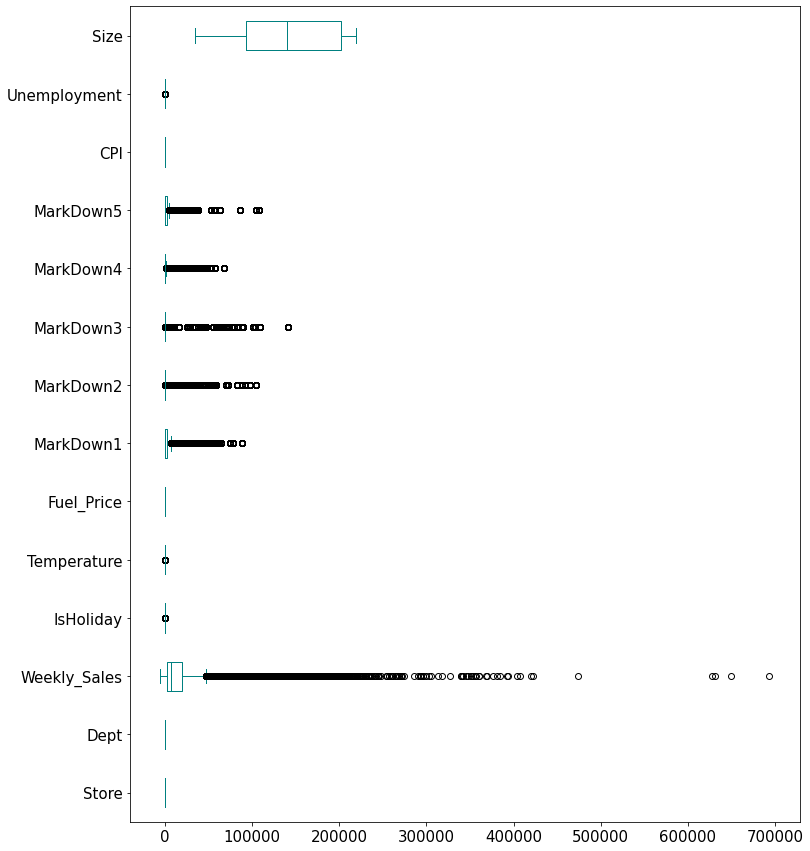

In [55]:
#Visualize data in boxplots to look for outliers
boxplot = retailDataCleaned.boxplot(grid=False, vert=False, fontsize=15, color='teal', figsize=(12,15))

In [56]:
#Calculate the correlation coefficients
corr = retailDataCleaned.corr()

#plot retail data in Pearsons correlation heat map 
corr.round(2).style.background_gradient(cmap='coolwarm')

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
Store,1.000000,0.020000,-0.090000,-0.000000,-0.050000,0.070000,-0.060000,-0.030000,-0.020000,-0.040000,-0.010000,-0.210000,0.210000,-0.180000
Dept,0.020000,1.000000,0.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010000,0.010000,-0.000000
Weekly_Sales,-0.090000,0.150000,1.000000,0.010000,-0.000000,-0.000000,0.050000,0.020000,0.040000,0.040000,0.050000,-0.020000,-0.030000,0.240000
IsHoliday,-0.000000,0.000000,0.010000,1.000000,-0.160000,-0.080000,-0.000000,0.210000,0.270000,0.010000,-0.020000,-0.000000,0.010000,0.000000
Temperature,-0.050000,0.000000,-0.000000,-0.160000,1.000000,0.140000,-0.030000,-0.180000,-0.060000,-0.050000,-0.010000,0.180000,0.100000,-0.060000
Fuel_Price,0.070000,0.000000,-0.000000,-0.080000,0.140000,1.000000,0.300000,0.030000,0.020000,0.170000,0.220000,-0.160000,-0.030000,0.000000
MarkDown1,-0.060000,0.000000,0.050000,-0.000000,-0.030000,0.300000,1.000000,0.170000,-0.010000,0.840000,0.420000,0.010000,-0.110000,0.170000
MarkDown2,-0.030000,0.000000,0.020000,0.210000,-0.180000,0.030000,0.170000,1.000000,-0.010000,0.110000,0.130000,-0.000000,-0.040000,0.080000
MarkDown3,-0.020000,0.000000,0.040000,0.270000,-0.060000,0.020000,-0.010000,-0.010000,1.000000,-0.010000,0.040000,-0.010000,-0.020000,0.030000
MarkDown4,-0.040000,0.000000,0.040000,0.010000,-0.050000,0.170000,0.840000,0.110000,-0.010000,1.000000,0.300000,-0.000000,-0.080000,0.130000


In [57]:
#More insights about the unique values of the data and unique values of the stores and departments
#Print unique values 
print(retailDataCleaned.nunique(), '\n====================')
print('Store Numbers:', '\n--------------------', retailDataCleaned.Store.unique(), '\n====================')
print('Department Numbers:', '\n--------------------', retailDataCleaned.Dept.unique())

Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
Temperature       3528
Fuel_Price         892
MarkDown1         2278
MarkDown2         1499
MarkDown3         1662
MarkDown4         1945
MarkDown5         2294
CPI               2145
Unemployment       349
Type                 3
Size                40
dtype: int64 
Store Numbers: 
-------------------- [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45] 
Department Numbers: 
-------------------- [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 45 46 47 48 49 51 52
 54 55 56 58 59 60 67 71 72 74 77 78 79 80 81 82 83 85 87 90 91 92 93 94
 95 96 97 98 99 39 50 43 65]


In [58]:
#View of top and least perfoming stores and departments
store_performance = retailDataCleaned.groupby(by=['Store', 'Dept', 'Date'], as_index=False)['Weekly_Sales'].sum()
print('Top Performing Stores by Department and Date', '\n----------------------------------------------')
print(store_performance.sort_values('Weekly_Sales', ascending=False)[:20], '\n==================================================')
print('Least Performing Stores by Department and Date', '\n----------------------------------------------')
print(store_performance.sort_values('Weekly_Sales')[:20])

Top Performing Stores by Department and Date 
----------------------------------------------
        Store  Dept        Date  Weekly_Sales
95372      10    72  2010-11-26     693099.36
338014     35    72  2011-11-25     649770.18
95426      10    72  2011-11-25     630999.19
337960     35    72  2010-11-26     627962.93
135664     14    72  2010-11-26     474330.10
195087     20    72  2010-11-26     422306.25
264389     27    72  2010-11-26     420586.57
88428      10     7  2010-12-24     406988.63
95377      10    72  2010-12-24     404245.03
214431     22    72  2010-11-26     393705.20
195141     20    72  2011-11-25     392023.02
37254       4    72  2011-11-25     385051.04
37200       4    72  2010-11-26     381072.11
135718     14    72  2011-11-25     375948.31
224410     23    72  2010-11-26     369830.98
264443     27    72  2011-11-25     368484.19
115275     12    72  2011-11-25     360140.66
115221     12    72  2010-11-26     359995.60
128984     14     7  2010-12-24  